In [2]:
import numpy as np
import numpy.linalg as nplin
import scipy.linalg as cplin
import scipy.optimize as opt
#Load data 
problem=2;
A=np.load("P"+str(problem)+"A.npy");
b=np.load("P"+str(problem)+"b.npy");
c=np.load("P"+str(problem)+"c.npy");
AT=np.transpose(A)
#Set parameters
mu=100; gamma=0.9; eps_mu=1e-4; 
#Set initial guess x_0/s_0
m1=20; m2=30; m3=10; M=m1+m2+m3; N=3
x_0=np.zeros([M*(M+1),1]);
x_0[:m1*M]=1/m1/M
x_0[m1*M:(m1+m2)*M]=1/m2/M
x_0[(m1+m2)*M:M*M]=1/m3/M
x_0[-M:]=1/M;
y_0=np.zeros([(N+1)*M+1-N,1]);
y_0[:M]=-1;y_0[-1]=-1;
s_0=c-np.matmul(AT,y_0)


In [3]:
def stepsize(x,s,dx,ds,eta=0.9995):
    alphax = -1/np.min(np.min(np.divide(dx,x)),-1); alphax = min(1, eta * alphax);
    alphas = -1/np.min(np.min(np.divide(ds,s)),-1); alphas = min(1, eta * alphas);
    return (alphax,alphas)

In [4]:
x=np.array(x_0);
s=np.array(s_0);
p=np.array(y_0);
max_ite=50;
count=0;
eps=1e-4
while (np.mean(np.multiply(x,s))>eps and count<max_ite):
    rp = np.matmul(A,x)-b;
    rd = np.matmul(AT,p)+s-c;
    rc = np.multiply(x,s);
    mu = np.mean(rc);
    
    ## Check relative decrease in residual, for purposes of convergence test
    ##residual  = norm([Rb;Rc;Rxs])/bc;
    
    ## ----- Predictor step -----
    
    # Get affine-scaling direction
    D2 = np.diag(np.divide(x,s)[:,0]);
    t1 = np.multiply(x,rd)-rc;  
    t2 = -(rp+np.matmul(A,np.divide(t1,s))); 
    AD2A=np.matmul(A,np.matmul(D2,AT))
    #%% Solve linear system AD^2A dp == t2;
    dp=nplin.solve(AD2A,t2)
  
    dx = np.divide((np.multiply(np.matmul(AT,dp),x)+t1),s);
    ds = -np.divide((np.multiply(s,dx)+rc),x);
    eta = max(0.95,1-mu); 
    
    #%(14.21ab)
    alphax = -1/np.min(np.min(np.divide(dx,x)),-1);
    alphas = -1/np.min(np.min(np.divide(ds,s)),-1);
    #%(14.22)

    
    mu_aff = np.mean(np.multiply(x+alphax*dx,s+alphas*ds));
    sigma = (mu_aff/mu)**3;
    
    rc = rc+np.multiply(dx,ds)-sigma*mu;
    t1 = np.multiply(x,rd)-rc; 
    t2 = -(rp+np.matmul(A,np.divide(t1,s)));
    
    #%% solve linear system AD^2A dp == t2;
    dp=nplin.solve(AD2A,t2)
    
    dx = np.divide((np.multiply(np.matmul(AT,dp),x)+t1),s);
    ds = -np.divide((np.multiply(s,dx)+rc),x);

    alphax, alphas = stepsize(x, s, dx, ds, eta);
    x = x + alphax * dx;
    s = s + alphas * ds;
    p = p + alphas * dp;
    
    print(np.mean(np.multiply(x,s)))
    print(np.sum(np.multiply(x,c)))
    count+=1



0.9623383580523182
2763.8174324113916
0.34673462073262107
2313.5215504756175
0.195316688833924
2022.9543551683203
0.06610578023343494
1653.1055844229193
0.018574789483892497
1513.5493055620873
0.00665459484134546
1474.2413081761124
0.0035039698439867572
1466.0708640092475
0.0009931597777130905
1457.3547332402588
0.00027390383850250575
1454.8563761829207
1.4582198059838536e-05
1453.9296392744252


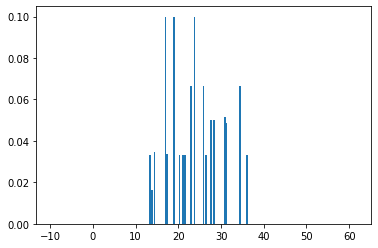

In [5]:
qs=np.load("P2q.npy",allow_pickle=True)
q1=qs[0]
q2=qs[1]
q3=qs[2]
import matplotlib.pyplot as plt

plt.bar(np.concatenate([q1,q2,q3]),x[-M:,0],width=0.4)
plt.savefig("P2_pc")

In [6]:
count

10

In [7]:
q1

array([ 2.13647389, -2.64470809,  5.84631894, -6.98020947, -2.94254153,
        0.04958081, -6.58950368,  0.95205625, -5.73286034, -0.09772471,
       -1.41441751,  4.08656681, -3.81226385,  0.27255582, -5.02069786,
       -3.17954019,  7.19494216, -8.38522149, -9.47602305,  4.71295821])

In [8]:
q2

array([23.77506235, 25.90793152, 14.44796339, 13.38625086, 30.95782642,
       27.63501945, 21.09838795, 20.29635571, 22.97877629,  7.55646666,
       10.80359335, 26.43684217, 21.24387921, 36.68363111,  8.70643644,
       37.63070613,  6.77734705, 17.01520291, 10.23293397, 13.87057592,
       28.4110526 ,  3.84849208, 36.09820298, 31.27980933, 34.43577525,
       21.61291983,  8.28579134, 17.27605099, 13.98069211, 18.94498462])

In [9]:
q3

array([51.01611139, 61.37384657, 54.58824101, 54.24744202, 57.46986682,
       51.05774993, 44.22655963, 47.22199274, 47.96861929, 48.65183471])